### 1. Se pide:

A partir del archivo "USA_Housing.csv", realizar la regresión no lineal entre cada columna numérica con la columna 'price' utilizando:

- Regresión polinómica no lineal con grados del 2 al 10. ¿El score se estanca a partir de cierto grado?
- SVR

In [2]:
import pandas as pd

df = pd.read_csv("../data/USA_Housing.csv")
df

Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0         79545.458574             5.682861                   7.009188   
1         79248.642455             6.002900                   6.730821   
2         61287.067179             5.865890                   8.512727   
3         63345.240046             7.188236                   5.586729   
4         59982.197226             5.040555                   7.839388   
...                ...                  ...                        ...   
4995      60567.944140             7.830362                   6.137356   
4996      78491.275435             6.999135                   6.576763   
4997      63390.686886             7.250591                   4.805081   
4998      68001.331235             5.534388                   7.130144   
4999      65510.581804             5.992305                   6.792336   

      Avg. Area Number of Bedrooms  Area Population         Price  \
0                             4.09     23086.800503  1.059034e+06   
1                             3.09     40173.072174  1.505891e+06   
2                             5.13     36882.159400  1.058988e+06   
3                             3.26     34310.242831  1.260617e+06   
4                             4.23     26354.109472  6.309435e+05   
...                            ...              ...           ...   
4995                          3.46     22837.361035  1.060194e+06   
4996                          4.02     25616.115489  1.482618e+06   
4997                          2.13     33266.145490  1.030730e+06   
4998                          5.44     42625.620156  1.198657e+06   
4999                          4.07     46501.283803  1.298950e+06   

                                                Address  
0     208 Michael Ferry Apt. 674\nLaurabury, NE 3701...  
1     188 Johnson Views Suite 079\nLake Kathleen, CA...  
2     9127 Elizabeth Stravenue\nDanieltown, WI 06482...  
3                             USS Barnett\nFPO AP 44820  
4                            USNS Raymond\nFPO AE 09386  
...                                                 ...  
4995                   USNS Williams\nFPO AP 30153-7653  
4996              PSC 9258, Box 8489\nAPO AA 42991-3352  
4997  4215 Tracy Garden Suite 076\nJoshualand, VA 01...  
4998                          USS Wallace\nFPO AE 73316  
4999  37778 George Ridges Apt. 509\nEast Holly, NV 2...  

[5000 rows x 7 columns]

In [8]:
# Import function to create training and test set splits
from sklearn.model_selection import train_test_split
# Import function to automatically create polynomial features! 
from sklearn.preprocessing import PolynomialFeatures
# Import Linear Regression
from sklearn.linear_model import LinearRegression

from sklearn.metrics import r2_score

import numpy as np

## Regresión polinómica no lineal con grados del 2 al 10. ¿El score se estanca a partir de cierto grado?

In [3]:
# Divido por train y test

X_train, X_test, y_train, y_test = train_test_split(df['Avg. Area Income'].values, df['Price'].values,test_size=0.2)

In [5]:
# Creo el objeto de modelo polinómico y lo entreno con X train
degree = 2

polinominal_model = PolynomialFeatures(degree) 
X_poly = polinominal_model.fit_transform(X_train.reshape(-1, 1), y_train)

In [9]:
# Creo el objeto de Lineal Regression y lo entreno con el entrenamiento polinómico

lin_reg_model = LinearRegression()
lin_reg_model.fit(X_poly, y_train)
y_pred = lin_reg_model.predict(X_poly)

In [11]:
print("Score:", r2_score(y_train, y_pred)*100)

Score: 41.08109535615948


In [15]:
lista_columnas = ["Avg. Area Income", "Avg. Area House Age", "Avg. Area Number of Rooms", "Avg. Area Number of Bedrooms", "Area Population"]

for columna in lista_columnas:
    print("###############################\n")
    for degree in range(2,11):
        X_train, X_test, y_train, y_test = train_test_split(df[columna].values, df['Price'].values,test_size=0.2)

        # Creo el objeto de modelo polinómico y lo entreno con X train
        polinominal_model = PolynomialFeatures(degree) 
        X_poly = polinominal_model.fit_transform(X_train.reshape(-1, 1), y_train)


        # Creo el objeto de Lineal Regression y lo entreno con el entrenamiento polinómico
        lin_reg_model = LinearRegression()
        lin_reg_model.fit(X_poly, y_train)
        y_pred = lin_reg_model.predict(X_poly)

        print("Columna", columna, "----- Degree:", degree)
        print("Score:", r2_score(y_train, y_pred)*100, "\n" )

###############################

Columna Avg. Area Income ----- Degree: 2
Score: 40.221386078333786 

Columna Avg. Area Income ----- Degree: 3
Score: 41.163257070805926 

Columna Avg. Area Income ----- Degree: 4
Score: 41.09246299674547 

Columna Avg. Area Income ----- Degree: 5
Score: 40.92319183355101 

Columna Avg. Area Income ----- Degree: 6
Score: 41.6190814071863 

Columna Avg. Area Income ----- Degree: 7
Score: 41.31427162394882 

Columna Avg. Area Income ----- Degree: 8
Score: 41.00267927625172 

Columna Avg. Area Income ----- Degree: 9
Score: 40.42751665008548 

Columna Avg. Area Income ----- Degree: 10
Score: 39.98633286194967 

###############################

Columna Avg. Area House Age ----- Degree: 2
Score: 19.852694902179714 

Columna Avg. Area House Age ----- Degree: 3
Score: 20.576486913831694 

Columna Avg. Area House Age ----- Degree: 4
Score: 21.161045461694282 

Columna Avg. Area House Age ----- Degree: 5
Score: 19.86543651196341 

Columna Avg. Area House Age -----

## SVR

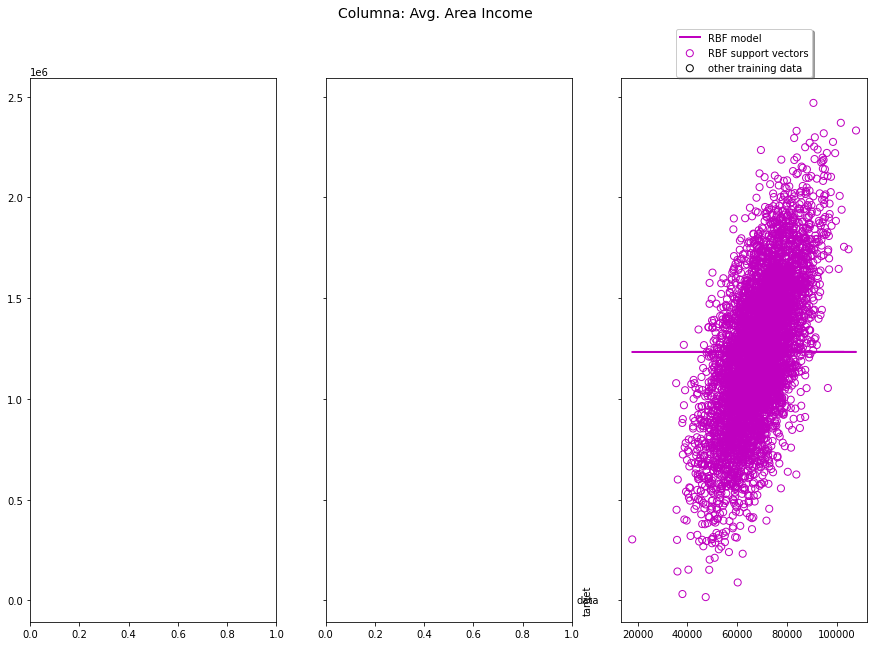

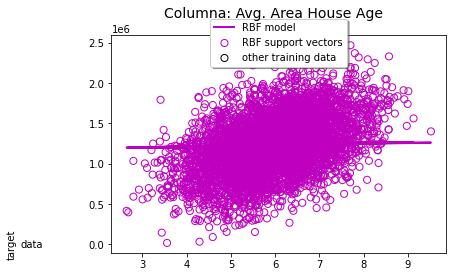

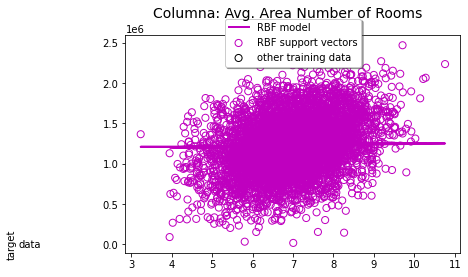

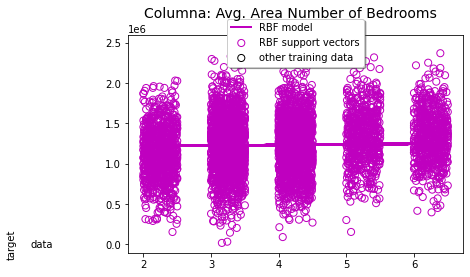

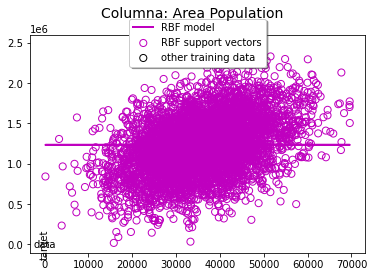

In [37]:
import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

lista_columnas = ["Avg. Area Income", "Avg. Area House Age", "Avg. Area Number of Rooms", "Avg. Area Number of Bedrooms", "Area Population"]

plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)

for columna in lista_columnas:

    X = df[columna].to_numpy().reshape(-1,1)
    y = df["Price"].to_numpy().reshape(-1,1)
    
    Svr_rbf = SVR(C=100, gamma=0.1, epsilon=.1) # Por defecto kernel = "rbf"

    model = Svr_rbf.fit(X, y)
    y_prediction = Svr_rbf.predict(X)

    plt.plot(X, y_prediction, color="m", lw=2, label='{} model'.format("RBF"))

    plt.scatter(X[Svr_rbf.support_], y[Svr_rbf.support_], facecolor="none", edgecolor="m", s=50, label='{} support vectors'.format("RBF"))
    plt.scatter(X[np.setdiff1d(np.arange(len(X)), Svr_rbf.support_)],
                     y[np.setdiff1d(np.arange(len(X)), Svr_rbf.support_)],
                     facecolor="none", edgecolor="k", s=50,
                     label='other training data')

    plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
                    ncol=1, fancybox=True, shadow=True)

    plt.text(0.5, 0.04, 'data', ha='center', va='center')
    plt.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
    plt.suptitle("Columna: "+ columna, fontsize=14)
    plt.show()

### 2. Se pide:

En el anterior dataset, la columna "Avg. Area Number of Bedrooms" está en un rango numérico limitado:

1. Cambia todos los datos para que sean enteros redondeando hacia el entero más cercano. Si es .5 exacto, se redondea hacia abajo.

2. Cuando lo hayas hecho, tendrás una columna con números enteros en un rango limitado. Ahora trata a esa columna como una serie de valores discretos (classes, labels). 

3. Usando las demás columnas numéricas y una a una, utiliza SVM (SVC) para clasificar esa columna modificada.

4. Usando todas las demás columnas a la vez, utiliza SVM para clasificar esa columna modificada. Es decir, "Avg. Area Income" con nuestro target, después "Avg. Area House Age", ... ¿hace aumentar el score? ¿por qué? 

5. ¿Qué columna tiene mejor correlación con "Avg. Area Number of Bedrooms" una vez modificada? ¿qué columna da mejor score para nuestro target? 